In [2]:
import numpy as np
import re
import pandas as pd
import edlib
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os

In [3]:
green_purple = sns.diverging_palette(300, 125, l=30, as_cmap=True)
custom_greens = sns.light_palette((125, 100, 30), input='husl', as_cmap=True)
custom_purples = sns.light_palette((300, 100, 30), input='husl', as_cmap=True)

In [4]:
def open_fastq(input_fastq):
    output = []
    current_read = []
    for i, line in enumerate(open(input_fastq, 'r')):
        if i%4 != 3:
            current_read += [line.strip()]
        else:
            current_read += [line.strip()]
            output += [current_read]
            current_read = []
    return output

In [5]:
whitelist = []
for line in open('/Users/zaindossani/Downloads/bc1_revcom_768.txt', 'r'):
    whitelist += line.strip().split(",")

In [6]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

amp1_name = '5\'LTR'
amp2_name = 'CXCR4'
amp3_name = 'CCR5'

common = (amp1.index.intersection(amp2.index)).intersection(amp3.index)

edit_percents = []

for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5 and sum(amp3.loc[cell]) >= 5:
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3.loc[cell].index, amp3.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)
        
        edit_percents += [[cell, amp1_edit_percent, amp2_edit_percent, amp3_edit_percent]]

amp1_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

        

common_2 = (amp1_2.index.intersection(amp2_2.index)).intersection(amp3_2.index)

for cell in common_2:
    if sum(amp1_2.loc[cell]) >= 5 and sum(amp2_2.loc[cell]) >=5 and sum(amp3_2.loc[cell]) >= 5:
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1_2.loc[cell].index, amp1_2.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2_2.loc[cell].index, amp2_2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3_2.loc[cell].index, amp3_2.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)
        
        edit_percents += [[cell, amp1_edit_percent, amp2_edit_percent, amp3_edit_percent]]

output_data_combined = pd.DataFrame(edit_percents, columns = ['Name', '5\' LTR', 'CXCR4', 'CCR5'])

bins = pd.IntervalIndex.from_tuples([(-0.001, 0.2), (0.2, 0.8), (0.8, 1.0)])

output_data_combined['5\' LTR bins'] = pd.cut(output_data_combined['5\' LTR'], bins)
output_data_combined['CXCR4 bins'] = pd.cut(output_data_combined['CXCR4'], bins)
output_data_combined['CCR5 bins'] = pd.cut(output_data_combined['CCR5'], bins)

#fig, ax = plt.subplots(figsize=(12,12))
#ax = sns.heatmap(output_data_combined.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins']).drop(['Name', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=green_purple)





In [7]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

amp1_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)


amp1_name = '5\'LTR'
amp2_name = 'CXCR4'
amp3_name = 'CCR5'

common_1 = (amp1.index.intersection(amp2.index)).intersection(amp3.index)
common_2 = (amp1_2.index.intersection(amp2_2.index)).intersection(amp3_2.index)

total_cells = 0

amp1bi_amp2bi_amp3bi = 0
amp1bi_amp2mono_amp3bi = 0
amp1bi_amp2unedited_amp3bi = 0
amp1mono_amp2bi_amp3bi = 0
amp1mono_amp2mono_amp3bi = 0
amp1mono_amp2unedited_amp3bi = 0
amp1unedited_amp2bi_amp3bi = 0
amp1unedited_amp2mono_amp3bi = 0
amp1unedited_amp2unedited_amp3bi = 0

amp1bi_amp2bi_amp3mono = 0
amp1bi_amp2mono_amp3mono = 0
amp1bi_amp2unedited_amp3mono = 0
amp1mono_amp2bi_amp3mono = 0
amp1mono_amp2mono_amp3mono = 0
amp1mono_amp2unedited_amp3mono = 0
amp1unedited_amp2bi_amp3mono = 0
amp1unedited_amp2mono_amp3mono = 0
amp1unedited_amp2unedited_amp3mono = 0

amp1bi_amp2bi_amp3unedited = 0
amp1bi_amp2mono_amp3unedited = 0
amp1bi_amp2unedited_amp3unedited = 0
amp1mono_amp2bi_amp3unedited = 0
amp1mono_amp2mono_amp3unedited = 0
amp1mono_amp2unedited_amp3unedited = 0
amp1unedited_amp2bi_amp3unedited = 0
amp1unedited_amp2mono_amp3unedited = 0
amp1unedited_amp2unedited_amp3unedited = 0


for cell in common_1:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5 and sum(amp3.loc[cell]) >= 5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3.loc[cell].index, amp3.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)

        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2bi_amp3unedited += 1
                else:
                    amp1bi_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2unedited_amp3unedited += 1
                else:
                    amp1bi_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2mono_amp3unedited += 1
                else:
                    amp1bi_amp2mono_amp3mono += 1                    
                    
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2bi_amp3unedited += 1
                else:
                    amp1unedited_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2unedited_amp3unedited += 1
                else:
                    amp1unedited_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2mono_amp3unedited += 1
                else:
                    amp1unedited_amp2mono_amp3mono += 1
                    
        else:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2bi_amp3unedited += 1
                else:
                    amp1mono_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2unedited_amp3unedited += 1
                else:
                    amp1mono_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2mono_amp3unedited += 1
                else:
                    amp1mono_amp2mono_amp3mono += 1                    


for cell in common_2:
    if sum(amp1_2.loc[cell]) >= 5 and sum(amp2_2.loc[cell]) >=5 and sum(amp3_2.loc[cell]) >= 5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1_2.loc[cell].index, amp1_2.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2_2.loc[cell].index, amp2_2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3_2.loc[cell].index, amp3_2.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)

        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2bi_amp3unedited += 1
                else:
                    amp1bi_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2unedited_amp3unedited += 1
                else:
                    amp1bi_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2mono_amp3unedited += 1
                else:
                    amp1bi_amp2mono_amp3mono += 1                    
                    
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2bi_amp3unedited += 1
                else:
                    amp1unedited_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2unedited_amp3unedited += 1
                else:
                    amp1unedited_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2mono_amp3unedited += 1
                else:
                    amp1unedited_amp2mono_amp3mono += 1
                    
        else:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2bi_amp3unedited += 1
                else:
                    amp1mono_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2unedited_amp3unedited += 1
                else:
                    amp1mono_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2mono_amp3unedited += 1
                else:
                    amp1mono_amp2mono_amp3mono += 1                     
                    
                    
                
                
print(f'''There are {total_cells} cells that contain sufficient reads at both loci.
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1bi_amp2bi_amp3bi} {amp1bi_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1bi_amp2bi_amp3mono} {amp1bi_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1bi_amp2bi_amp3unedited} {amp1bi_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} biallelic {amp1bi_amp2mono_amp3bi} {amp1bi_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1bi_amp2mono_amp3mono} {amp1bi_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1bi_amp2mono_amp3unedited} {amp1bi_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1bi_amp2unedited_amp3bi} {amp1bi_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1bi_amp2unedited_amp3mono} {amp1bi_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} unedited {amp1bi_amp2unedited_amp3unedited} {amp1bi_amp2unedited_amp3unedited/total_cells:.4f}


      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1mono_amp2bi_amp3bi} {amp1mono_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1mono_amp2bi_amp3mono} {amp1mono_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1mono_amp2bi_amp3unedited} {amp1mono_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} biallelic  {amp1mono_amp2mono_amp3bi} {amp1mono_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1mono_amp2mono_amp3mono} {amp1mono_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1mono_amp2mono_amp3unedited} {amp1mono_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1mono_amp2unedited_amp3bi} {amp1mono_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1mono_amp2unedited_amp3mono} {amp1mono_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} unedited {amp1mono_amp2unedited_amp3unedited} {amp1mono_amp2unedited_amp3unedited/total_cells:.4f}
      
      
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} biallelic {amp1unedited_amp2bi_amp3bi} {amp1unedited_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} monoallelic {amp1unedited_amp2bi_amp3mono} {amp1unedited_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} unedited {amp1unedited_amp2bi_amp3unedited} {amp1unedited_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} biallelic {amp1unedited_amp2mono_amp3bi} {amp1unedited_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1unedited_amp2mono_amp3mono} {amp1unedited_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} unedited {amp1unedited_amp2mono_amp3unedited} {amp1unedited_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} biallelic {amp1unedited_amp2unedited_amp3bi} {amp1unedited_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} monoallelic {amp1unedited_amp2unedited_amp3mono} {amp1unedited_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} unedited {amp1unedited_amp2unedited_amp3unedited} {amp1unedited_amp2unedited_amp3unedited/total_cells:.4f}''')



There are 1659 cells that contain sufficient reads at both loci.
      5'LTR biallelic/CXCR4 biallelic/CCR5 biallelic 104 0.0627
      5'LTR biallelic/CXCR4 biallelic/CCR5 monoallelic 219 0.1320
      5'LTR biallelic/CXCR4 biallelic/CCR5 unedited 212 0.1278
      
      5'LTR biallelic/CXCR4 monoallelic/CCR5 biallelic 19 0.0115
      5'LTR biallelic/CXCR4 monoallelic/CCR5 monoallelic 151 0.0910
      5'LTR biallelic/CXCR4 monoallelic/CCR5 unedited 257 0.1549

      5'LTR biallelic/CXCR4 unedited/CCR5 biallelic 5 0.0030
      5'LTR biallelic/CXCR4 unedited/CCR5 monoallelic 31 0.0187
      5'LTR biallelic/CXCR4 unedited/CCR5 unedited 105 0.0633


      5'LTR monoallelic/CXCR4 biallelic/CCR5 biallelic 11 0.0066
      5'LTR monoallelic/CXCR4 biallelic/CCR5 monoallelic 47 0.0283
      5'LTR monoallelic/CXCR4 biallelic/CCR5 unedited 47 0.0283
      
      5'LTR monoallelic/CXCR4 monoallelic/CCR5 biallelic  4 0.0024
      5'LTR monoallelic/CXCR4 monoallelic/CCR5 monoallelic 66 0.0398
      5'

In [9]:
output_data_combined

,Name,5' LTR,CXCR4,CCR5,5' LTR bins,CXCR4 bins,CCR5 bins
0,GGCGATGCTCAACCAA,0.565217,0.285714,0.111111,"(0.2, 0.8]","(0.2, 0.8]","(-0.001, 0.2]"
1,ATGGAGTTAGTAACTT,0.588235,0.142857,0.277778,"(0.2, 0.8]","(-0.001, 0.2]","(0.2, 0.8]"
2,ACTCTCCTGAGCCGTT,0.619048,0.456522,0.107143,"(0.2, 0.8]","(0.2, 0.8]","(-0.001, 0.2]"
3,CGACGCGTTTCTAACC,1.000000,0.909091,0.058824,"(0.8, 1.0]","(0.8, 1.0]","(-0.001, 0.2]"
4,TAGCATTCCTACATTA,1.000000,1.000000,0.357143,"(0.8, 1.0]","(0.8, 1.0]","(0.2, 0.8]"
...,...,...,...,...,...,...,...
1654,GAACGGAGTATTCGAA,1.000000,0.400000,0.125000,"(0.8, 1.0]","(0.2, 0.8]","(-0.001, 0.2]"
1655,TTGTGAGAATTCCTGC,1.000000,0.729730,0.000000,"(0.8, 1.0]","(0.2, 0.8]","(-0.001, 0.2]"
1656,ATTGGTCTAACGTACC,1.000000,0.142857,0.285714,"(0.8, 1.0]","(-0.001, 0.2]","(0.2, 0.8]"
1657,GTCCGAATAGCGTGTA,1.000000,1.000000,0.000000,"(0.8, 1.0]","(0.8, 1.0]","(-0.001, 0.2]"


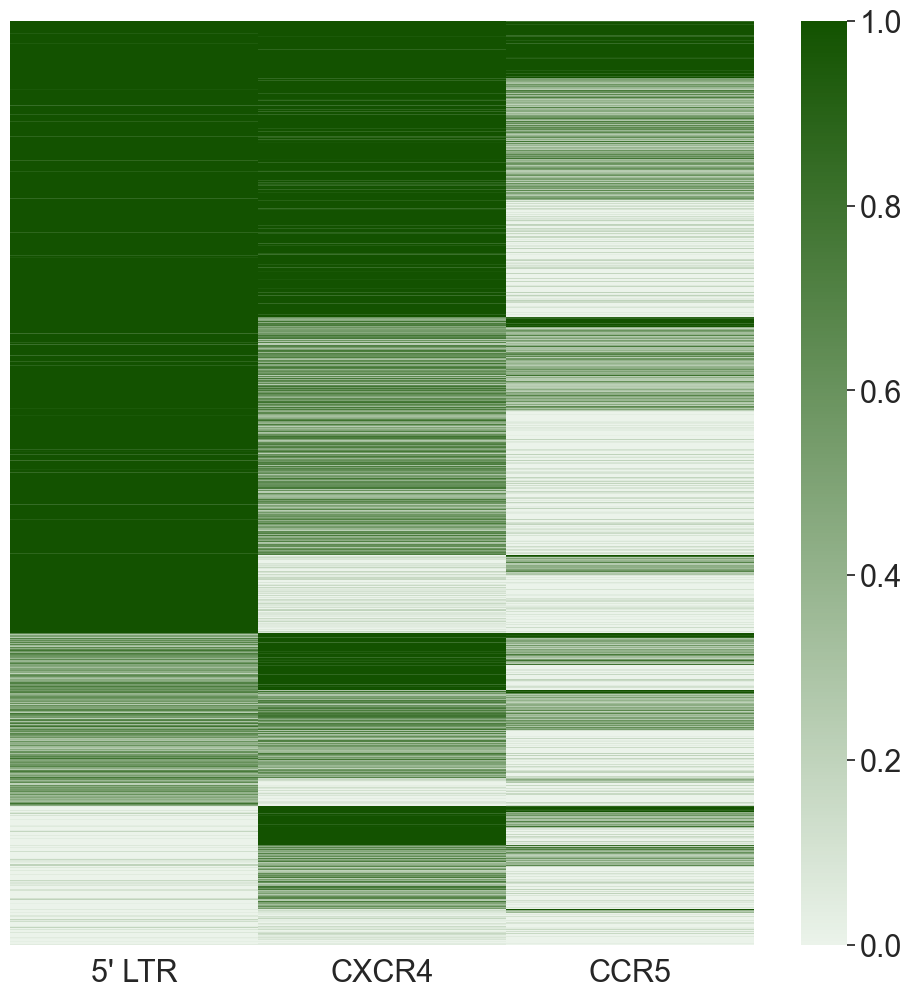

In [30]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data_combined.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=custom_greens, yticklabels=False)
sns.set(font_scale=2)
fig.savefig('carpet_plot_hc69.svg')

In [9]:
output_data_combined['5\' LTR cat'] = [x.right - 0.2 if x.right == 0.8 else x.right - 0.2 if x.right == 0.2 else x.right for x in output_data_combined['5\' LTR bins']]
output_data_combined['CXCR4 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right - 0.2 if x.right == 0.2 else x.right for x in output_data_combined['CXCR4 bins']]
output_data_combined['CCR5 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right - 0.2 if x.right == 0.2 else x.right for x in output_data_combined['CCR5 bins']]

In [11]:
output_data_combined

,Name,5' LTR,CXCR4,CCR5,5' LTR bins,CXCR4 bins,CCR5 bins,5' LTR cat,CXCR4 cat,CCR5 cat
0,GGCGATGCTCAACCAA,0.565217,0.285714,0.111111,"(0.2, 0.8]","(0.2, 0.8]","(-0.001, 0.2]",0.6,0.6,0.0
1,ATGGAGTTAGTAACTT,0.588235,0.142857,0.277778,"(0.2, 0.8]","(-0.001, 0.2]","(0.2, 0.8]",0.6,0.0,0.6
2,ACTCTCCTGAGCCGTT,0.619048,0.456522,0.107143,"(0.2, 0.8]","(0.2, 0.8]","(-0.001, 0.2]",0.6,0.6,0.0
3,CGACGCGTTTCTAACC,1.000000,0.909091,0.058824,"(0.8, 1.0]","(0.8, 1.0]","(-0.001, 0.2]",1.0,1.0,0.0
4,TAGCATTCCTACATTA,1.000000,1.000000,0.357143,"(0.8, 1.0]","(0.8, 1.0]","(0.2, 0.8]",1.0,1.0,0.6
...,...,...,...,...,...,...,...,...,...,...
1654,GAACGGAGTATTCGAA,1.000000,0.400000,0.125000,"(0.8, 1.0]","(0.2, 0.8]","(-0.001, 0.2]",1.0,0.6,0.0
1655,TTGTGAGAATTCCTGC,1.000000,0.729730,0.000000,"(0.8, 1.0]","(0.2, 0.8]","(-0.001, 0.2]",1.0,0.6,0.0
1656,ATTGGTCTAACGTACC,1.000000,0.142857,0.285714,"(0.8, 1.0]","(-0.001, 0.2]","(0.2, 0.8]",1.0,0.0,0.6
1657,GTCCGAATAGCGTGTA,1.000000,1.000000,0.000000,"(0.8, 1.0]","(0.8, 1.0]","(-0.001, 0.2]",1.0,1.0,0.0


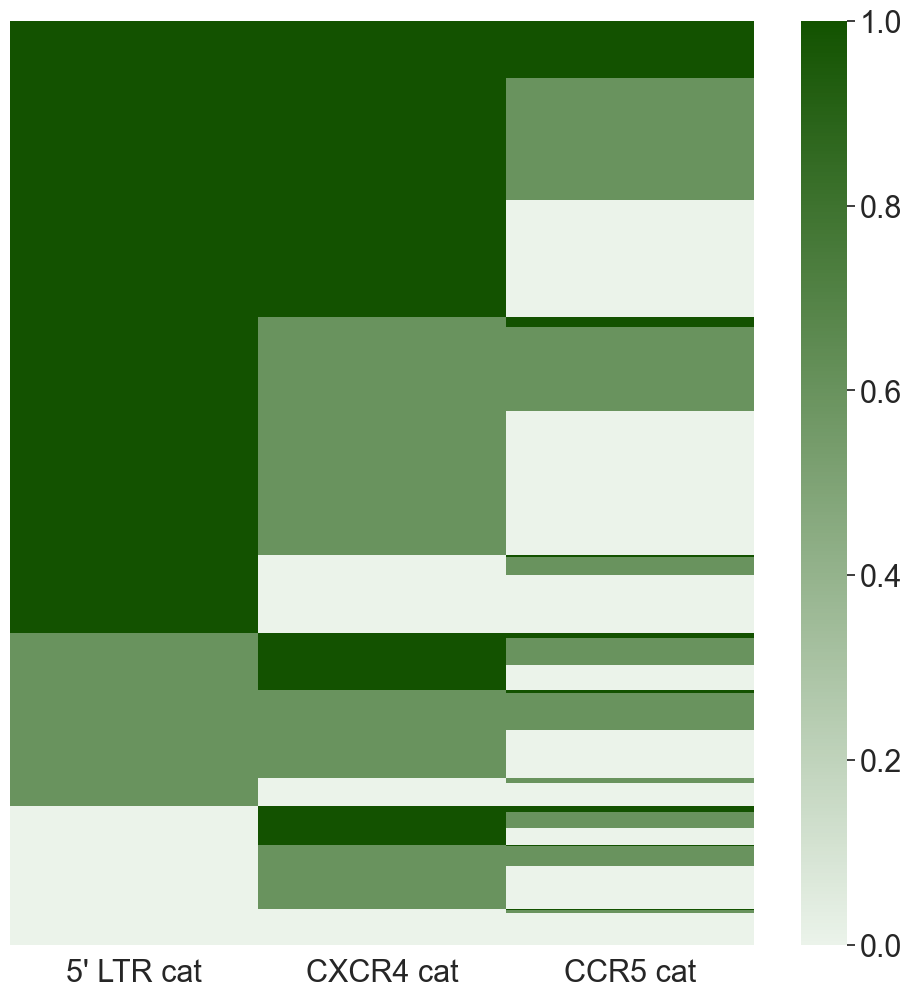

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data_combined.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', '5\' LTR', 'CXCR4', 'CCR5', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=custom_greens, vmin=0, vmax=1, yticklabels=False)
sns.set(font_scale=2)
fig.savefig('carpet_plot_categorical_hc69.tif')

In [31]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)
common = amp1.index.intersection(amp2.index)
total_cells = 0

amp1bi_amp2bi = 0
amp1bi_amp2mono = 0
amp1bi_amp2unedited = 0
amp1mono_amp2bi = 0
amp1mono_amp2mono = 0
amp1mono_amp2unedited = 0
amp1unedited_amp2bi = 0
amp1unedited_amp2mono = 0
amp1unedited_amp2unedited = 0


for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                amp1bi_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1bi_amp2unedited += 1
            else:
                amp1bi_amp2mono += 1
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                amp1unedited_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1unedited_amp2unedited += 1
            else:
                amp1unedited_amp2mono += 1              
        else:
            if amp2_edit_percent >= 0.8:
                amp1mono_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1mono_amp2unedited += 1
            else:
                amp1mono_amp2mono += 1

print(f'''There are {total_cells} cells that contain sufficient reads at both loci.
      CXCR4 biallelic/CCR5 biallelic {amp1bi_amp2bi} {amp1bi_amp2bi/total_cells:.4f}
      CXCR4 biallelic/CCR5 monoallelic {amp1bi_amp2mono} {amp1bi_amp2mono/total_cells:.4f}
      CXCR4 biallelic/CCR5 unedited {amp1bi_amp2unedited} {amp1bi_amp2unedited/total_cells:.4f}
      
      CXCR4 monoallelic/CCR5 biallelic {amp1mono_amp2bi} {amp1mono_amp2bi/total_cells:.4f}
      CXCR4 monoallelic/CCR5 monoallelic {amp1mono_amp2mono} {amp1mono_amp2mono/total_cells:.4f}
      CXCR4 monoallelic/CCR5 unedited {amp1mono_amp2unedited} {amp1mono_amp2unedited/total_cells:.4f}
      
      CXCR4 unedited/CCR5 biallelic {amp1unedited_amp2bi} {amp1unedited_amp2bi/total_cells:.4f}
      CXCR4 unedited/CCR5 monoallelic {amp1unedited_amp2mono} {amp1unedited_amp2mono/total_cells:.4f}
      CXCR4 unedited/CCR5 unedited {amp1unedited_amp2unedited} {amp1unedited_amp2unedited/total_cells:.4f}''')


        
        
        
        

There are 2122 cells that contain sufficient reads at both loci.
      CXCR4 biallelic/CCR5 biallelic 65 0.0306
      CXCR4 biallelic/CCR5 monoallelic 279 0.1315
      CXCR4 biallelic/CCR5 unedited 865 0.4076
      
      CXCR4 monoallelic/CCR5 biallelic 6 0.0028
      CXCR4 monoallelic/CCR5 monoallelic 125 0.0589
      CXCR4 monoallelic/CCR5 unedited 454 0.2139
      
      CXCR4 unedited/CCR5 biallelic 3 0.0014
      CXCR4 unedited/CCR5 monoallelic 34 0.0160
      CXCR4 unedited/CCR5 unedited 291 0.1371


In [16]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/primary_macs/MB_expt_2_primary_macs/CRISPRessoBatch_on_batch_hc69ref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)
common = amp1.index.intersection(amp2.index)

amp1_name = 'CXCR4'
amp2_name = 'CCR5'

edit_percents = []

for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5:
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        
        edit_percents += [[cell, amp1_edit_percent, amp2_edit_percent]]


output_data = pd.DataFrame(edit_percents, columns = ['Name', 'CXCR4', 'CCR5'])
output_data['CXCR4 bins'] = pd.cut(output_data['CXCR4'], bins)
output_data['CCR5 bins'] = pd.cut(output_data['CCR5'], bins)


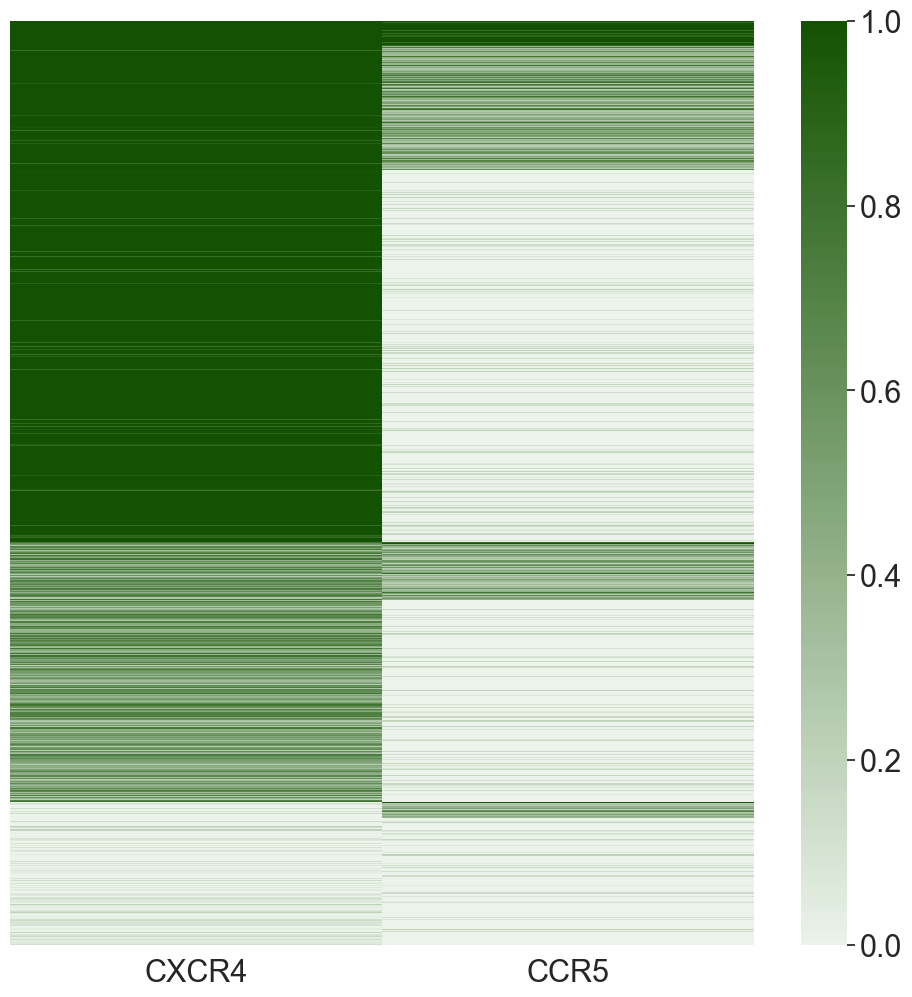

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=custom_greens, yticklabels=False)
sns.set(font_scale=2)
fig.savefig('carpet_plot_macs.tif')

In [17]:
output_data['CXCR4 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right - 0.2 if x.right == 0.2 else x.right for x in output_data['CXCR4 bins']]
output_data['CCR5 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right - 0.2 if x.right == 0.2 else x.right for x in output_data['CCR5 bins']]

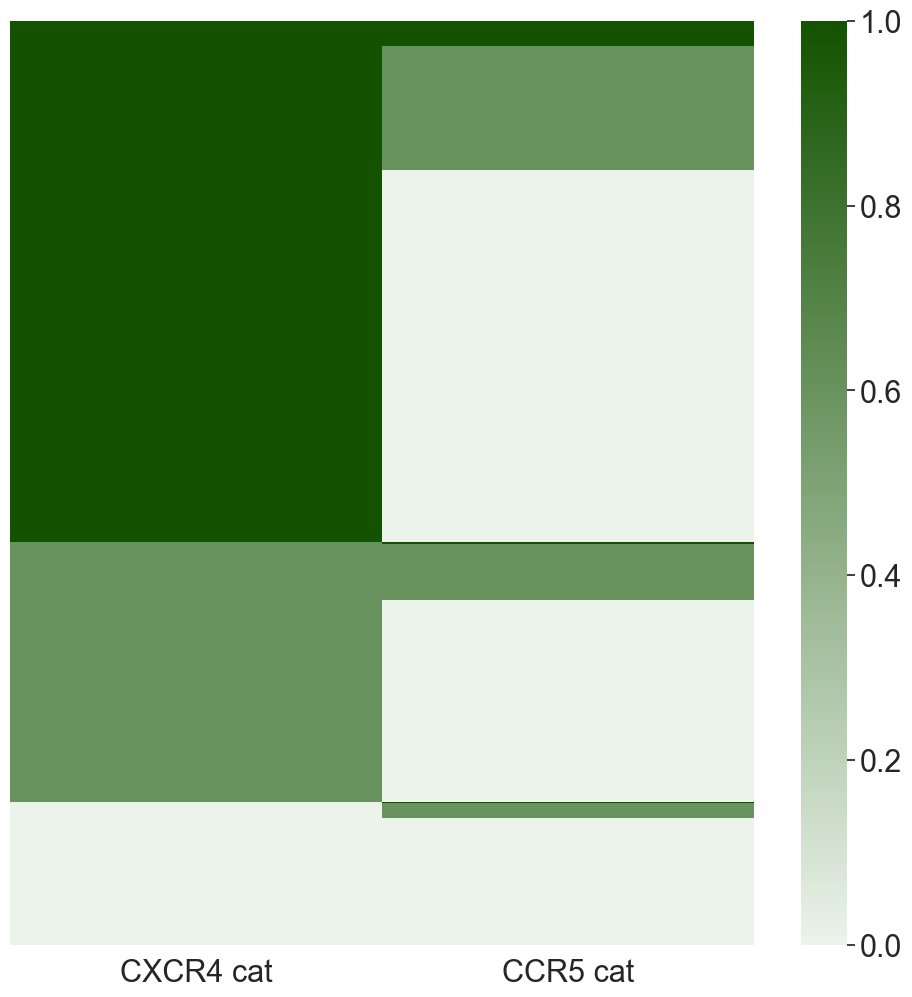

In [20]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', 'CXCR4', 'CCR5', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=custom_greens, vmin=0, vmax=1, yticklabels=False)
sns.set(font_scale=2)
fig.savefig('carpet_plot_categorical_mdm.svg')

<Axes: xlabel="5' LTR", ylabel='Count'>

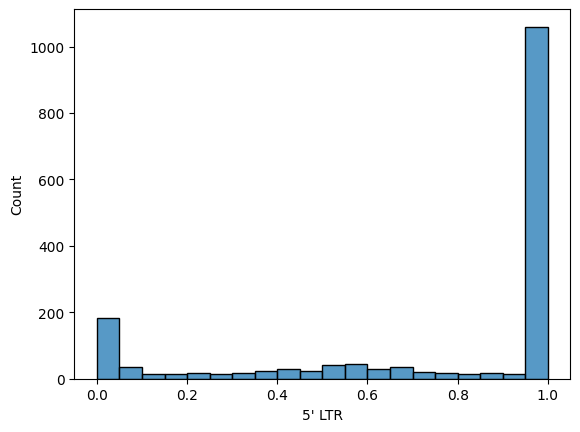

In [16]:
sns.histplot(data=output_data_combined['5\' LTR'], bins = 20)



<Axes: xlabel='CXCR4', ylabel='Count'>

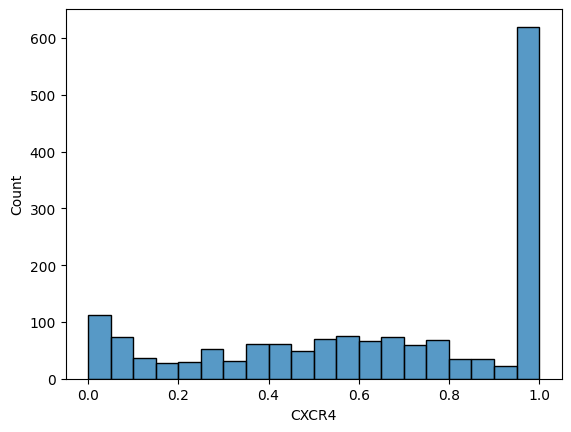

In [14]:
sns.histplot(data=output_data_combined['CXCR4'], bins = 20)

<Axes: xlabel='CCR5', ylabel='Count'>

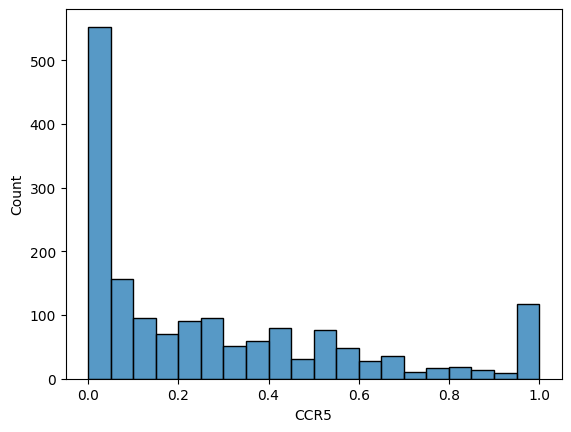

In [15]:
sns.histplot(data=output_data_combined['CCR5'], bins = 20)